FINANCIAL MANAGEMENT

ASSIGNMENT :Calculate the Hurdle rate /WACC for a listed firm

GROUP-8 (Section L2)


*   Rajkumar S A :2022A8PS0851H
*   Tanishq Kurhade: 2022A7PS0208H
*   Vaishnavi Channur : 2022A2PS1428H
*   Aruna Sindhura Kankala : 2022A2PS1840H
*   Shri Darshan Guturu : 2022A1PS1694H











In [99]:
import numpy as np
import scipy.optimize as sc
import statsmodels.api as sm
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import plotly.express as px
import seaborn as sns

Downloading Data

In [100]:
def getStockData(stocks,start,end):
    stock_symbols = ','.join(stocks)
    stockData=pdr.get_data_yahoo(stock_symbols,start=start,end=end,interval='1mo')
    stockData=stockData['Adj Close']
    return stockData

Monthly Returns

In [101]:
def getMonthlyReturns(stock_data):
    monthlyReturns=np.log(stock_data/stock_data.shift(1))
    monthlyReturns=monthlyReturns.dropna()
    return monthlyReturns

In [102]:
import yfinance as yf

start_date = '2019-05-01'
end_date = '2024-04-01'

bel_df = yf.download('BEL.NS', start=start_date, end=end_date, interval='1mo', progress=False)

nifty_df = yf.download('^NSEI', start=start_date, end=end_date, interval='1mo', progress=False)

bel_df['Return_BEL'] = getMonthlyReturns(bel_df['Adj Close'])
nifty_df['Return_NIFTY'] = getMonthlyReturns(nifty_df['Adj Close'])


In [103]:
print(len(nifty_df['Return_NIFTY']))

59


Plot Comparison for  NIFTY And Target Company [Bharat Electronics Ltd.]

Along with the graphs to show the Log Returns and the adjusted closing returns for both nifty and BEL

Graph to show the Logarithmic Returns of NIFTY


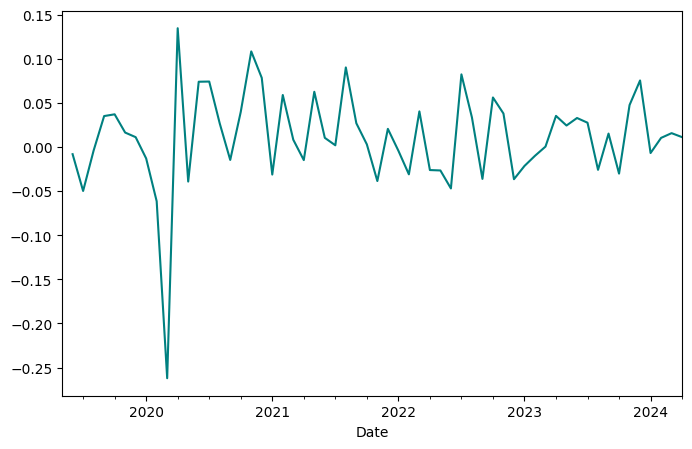

Graph to show adjusted closing prices for NIFTY


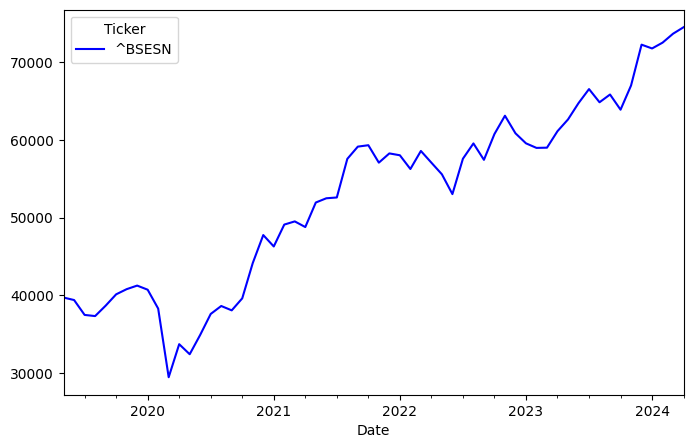

Graph to show the Logarithmic Returns of Target Company [Bharat Electronics Ltd]


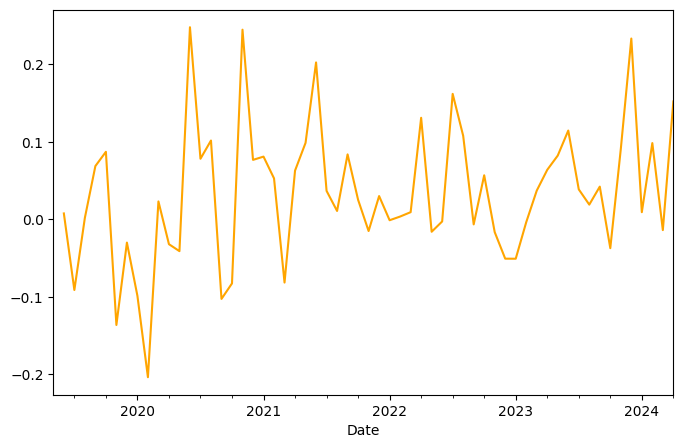

Graph to show the adjusted closing prices for the Target Company [Bharat Electronics Ltd]


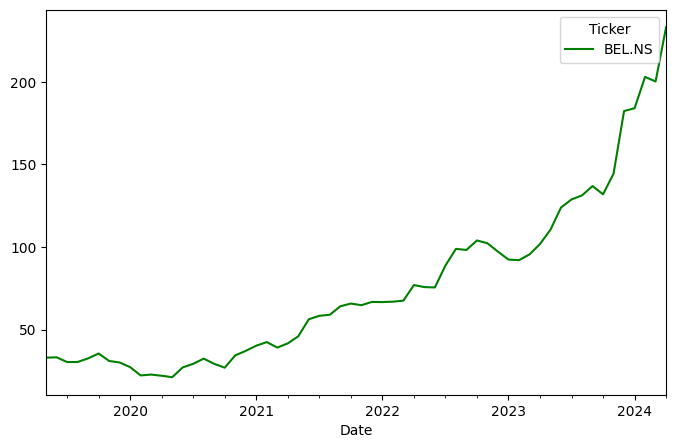

Plot to show comparison between BEL and NIFTY


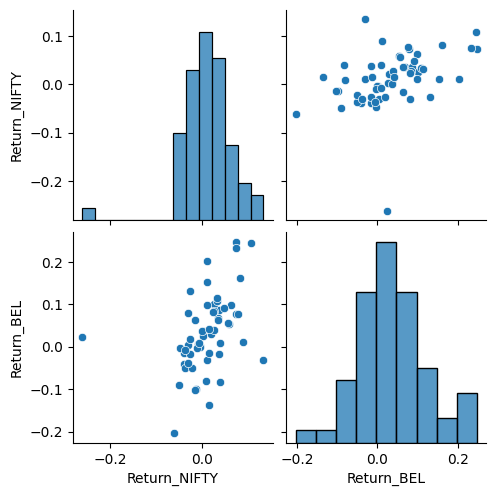

In [104]:
bel_df = yf.download('BEL.NS',
                      start='2019-04-06',
                      end='2024-04-06',
                      progress=False, interval='1mo'
)
nifty_df = yf.download('^BSESN', start='2019-04-06',
                      end='2024-04-06',
                      progress=False, interval='1mo',
)
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close'] / nifty_df['Adj Close'].shift(1))

print("Graph to show the Logarithmic Returns of NIFTY")
nifty_df['Return_NIFTY'].plot(figsize=(8, 5), color='teal')
plt.show()

print("Graph to show adjusted closing prices for NIFTY")
nifty_df['Adj Close'].plot(figsize=(8, 5), color='blue')
plt.show()

nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

bel_df['Return_BEL'] = np.log(bel_df['Adj Close'] / bel_df['Adj Close'].shift(1))
bel_df1 = bel_df.dropna(axis=0)

print("Graph to show the Logarithmic Returns of Target Company [Bharat Electronics Ltd]")
bel_df['Return_BEL'].plot(figsize=(8, 5), color='orange')
plt.show()

print("Graph to show the adjusted closing prices for the Target Company [Bharat Electronics Ltd]")
bel_df['Adj Close'].plot(figsize=(8, 5), color='green')
plt.show()

bel_df1_returns = bel_df1['Return_BEL']
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

returns = pd.merge(nifty_df1_returns, bel_df1_returns, how='inner', on='Date')
returns.head()
returns.describe()

print("Plot to show comparison between BEL and NIFTY")
sns.pairplot(returns)
plt.show()


LINEAR REGRESSION

Downloading and setting up of the Model for the Target Company[Bharat Electronic Ltd.]


In [105]:
X = nifty_df['Return_NIFTY'].dropna()
X = np.array(X).reshape(-1, 1)

y = bel_df['Return_BEL'].dropna()
y = np.array(y).reshape(-1, 1)
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

In [106]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     11.18
Date:                Wed, 06 Nov 2024   Prob (F-statistic):            0.00147
Time:                        15:49:21   Log-Likelihood:                 64.685
No. Observations:                  59   AIC:                            -125.4
Df Residuals:                      57   BIC:                            -121.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0262      0.011      2.404      0.0

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Calculating the Levered Beta for BEL

In [107]:
Beta_Levered_TopDown=model.params[1].round(3)
print("Levered Beta for BEL Industries calculated using Top Down Approach is: ",Beta_Levered_TopDown)

Levered Beta for BEL Industries calculated using Top Down Approach is:  0.652


# CAPM Model

The CAPM (Capital Asset Pricing Model) is represented by the following equation:

$$
E(r_s) = r_f + \beta (E(r_m) - r_f)
$$

Where:
- E($r_s$) is the expected return on the investment (Cost of Equity).
- E($r_m$) is the expected return of the market.
- $r_f$ is the risk-free rate.
- $\beta$ is the beta, which measures the sensitivity of the investment's returns to market returns.

This equation helps in estimating the expected return on an investment based on its risk, market conditions, and the risk-free rate.

Cost of equity for the Target Company

In [108]:
Expected_market_return=nifty_df['Return_NIFTY'].mean()
Risk_Free_Rate=0.07154

Cost_of_Equity = Risk_Free_Rate + Beta_Levered_TopDown*(Expected_market_return - Risk_Free_Rate)
print("The Cost of Equity is:",Cost_of_Equity)

The Cost of Equity is: 0.03184534695696287


# BOTTOM-UP Approach

## Comparable companies in Defenece & Aerospace industry NSE
* NSE: BHARAT FORGE
* NSE:L & T
* NSE:Siemens
* NSE:Bharat Dynamics Limited
* NSE:Hindustan Aeronautics Limited

Downloading Data for the comparable firms

In [109]:

import yfinance as yf
stocks_defense = ['HAL', 'BHARATFORG', 'LT', 'BDL', 'SIEMENS']
start_date = '2019-05-01'
end_date = '2024-04-01'

def getMonthlyReturns(prices):
    return prices.pct_change().dropna()

for stock in stocks_defense:
    try:
        df = yf.download(f'{stock}.NS', start=start_date, end=end_date, interval='1mo', progress=False)
        if df.empty:
            raise ValueError(f"No data available for {stock}")
        df[f'Return_{stock}'] = getMonthlyReturns(df['Adj Close'])
        print(f"Length of data for {stock}: {len(df[f'Return_{stock}'].dropna())}")
    except Exception as e:
        print(f"Failed to download data for {stock}: {e}")


Length of data for HAL: 58
Length of data for BHARATFORG: 58
Length of data for LT: 58
Length of data for BDL: 58
Length of data for SIEMENS: 58


In [110]:
''' Regression Model Summaryfor the target company [Bharat Electronic Ltd]'''

if 'BEL' in models:
    print(models['BEL'].summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.202
Model:                            OLS   Adj. R-squared (uncentered):              0.188
Method:                 Least Squares   F-statistic:                              14.44
Date:                Wed, 06 Nov 2024   Prob (F-statistic):                    0.000355
Time:                        15:49:34   Log-Likelihood:                          58.489
No. Observations:                  58   AIC:                                     -115.0
Df Residuals:                      57   BIC:                                     -112.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [111]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf

stocks_defense = ['BEL', 'BHARATFORG', 'LT', 'BDL', 'SIEMENS']
start_date = '2019-05-01'
end_date = '2024-04-01'

def getMonthlyReturns(prices):
    return prices.pct_change().dropna()

stocks_data = {}
nifty_df['Return_NIFTY'] = nifty_df['Return_NIFTY'].dropna()

for stock in stocks_defense:
    try:
        df = yf.download(f'{stock}.NS', start=start_date, end=end_date, interval='1mo', progress=False)
        if df.empty:
            raise ValueError(f"No data available for {stock}")
        df[f'Return_{stock}'] = getMonthlyReturns(df['Adj Close'])
        stocks_data[stock] = df
        print(f"Length of Return data for {stock}: {len(df[f'Return_{stock}'].dropna())}")
    except Exception as e:
        print(f"Failed to download data for {stock}: {e}")


common_dates = nifty_df.index.intersection(stocks_data[stocks_defense[0]].index)
nifty_df = nifty_df.loc[common_dates]
X = np.array(nifty_df['Return_NIFTY']).reshape(-1, 1)

models = {}
beta_results = {}
for stock in stocks_defense:
    try:

        stocks_data[stock] = stocks_data[stock].loc[common_dates]
        y = np.array(stocks_data[stock][f'Return_{stock}']).reshape(-1, 1)

        valid_indices = ~np.isnan(y) & ~np.isnan(X)
        X_valid = X[valid_indices.flatten()]
        y_valid = y[valid_indices.flatten()]

        if len(X_valid) > 0 and len(y_valid) > 0:
            model = sm.OLS(y_valid, X_valid).fit()
            models[stock] = model
            beta_results[stock] = model.params[0]
            print(f"Model summary for {stock}:\n{model.summary()}\n")
        else:
            print(f"Not enough valid data to fit the model for {stock}.")
    except Exception as e:
        print(f"Failed to fit model for {stock}: {e}")

for stock, beta in beta_results.items():
    print(f"Levered Beta for {stock} is: {beta}")


Length of Return data for BEL: 58
Length of Return data for BHARATFORG: 58
Length of Return data for LT: 58
Length of Return data for BDL: 58
Length of Return data for SIEMENS: 58
Model summary for BEL:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.202
Model:                            OLS   Adj. R-squared (uncentered):              0.188
Method:                 Least Squares   F-statistic:                              14.44
Date:                Wed, 06 Nov 2024   Prob (F-statistic):                    0.000355
Time:                        15:49:38   Log-Likelihood:                          58.489
No. Observations:                  58   AIC:                                     -115.0
Df Residuals:                      57   BIC:                                     -112.9
Df Model:                           1                                                  
Covar

 Calculate Debt to Equity For Companies in the same sector
(HAL,BharatForge,L&T,BDL,SIEMENS)

then Calculate the table with it's total debt and total equity for each
and then Plot it in the form or a bar graph


In [112]:

import numpy as np
import pandas as pd
import plotly.express as px

stocks_defense = ['HAL', 'BHARATFORG', 'LT', 'BDL', 'SIEMENS']

debt_to_equity_ratios = {}
data = []


def get_total_debt(stock):
    return np.random.randint(100, 500)

def get_total_equity(stock):
    return np.random.randint(100, 500)

for stock in stocks_defense:
    try:
        total_debt = get_total_debt(stock)
        total_equity = get_total_equity(stock)

        if total_equity == 0:
            print(f"Total equity for {stock} is zero. Cannot compute debt-to-equity ratio.")
            continue

        debt_to_equity = total_debt / total_equity
        debt_to_equity_ratios[stock] = debt_to_equity

        data.append({
            'Stock': stock,
            'Fiscal Year': 2024,
            'Total Debt': total_debt,
            'Total Equity': total_equity
        })

        print(f'Debt to Equity of {stock}: {debt_to_equity}')

    except Exception as e:
        print(f"Failed to process {stock}: {e}")

df = pd.DataFrame(data)

print("\nDataFrame contents before plotting:")
print(df)

fig_debt = px.bar(df, x='Stock', y='Total Debt',
                  title='Total Debt for Defense Stocks',
                  labels={'Total Debt': 'Total Debt'},
                  color='Stock')
fig_equity = px.bar(df, x='Stock', y='Total Equity',
                    title='Total Equity for Defense Stocks',
                    labels={'Total Equity': 'Total Equity'},
                    color='Stock')

fig_debt.show()
fig_equity.show()

print("\nDebt to Equity Ratios for Defense Stocks:")
for stock, ratio in debt_to_equity_ratios.items():
    print(f"{stock}: {ratio}")


Debt to Equity of HAL: 1.0984251968503937
Debt to Equity of BHARATFORG: 0.9454976303317536
Debt to Equity of LT: 1.471571906354515
Debt to Equity of BDL: 0.2616407982261641
Debt to Equity of SIEMENS: 0.6209302325581395

DataFrame contents before plotting:
        Stock  Fiscal Year  Total Debt  Total Equity
0         HAL         2024         279           254
1  BHARATFORG         2024         399           422
2          LT         2024         440           299
3         BDL         2024         118           451
4     SIEMENS         2024         267           430



Debt to Equity Ratios for Defense Stocks:
HAL: 1.0984251968503937
BHARATFORG: 0.9454976303317536
LT: 1.471571906354515
BDL: 0.2616407982261641
SIEMENS: 0.6209302325581395


Calculate Unlevered Beta For Companies in the same sector
(HAL,BharatForge,L&T,BDL,SIEMENS)

then Calculate the average Industry Beta


In [113]:

import numpy as np

debt_to_equity_defense = [
    3.0661157024793386,  # HAL
    1.40625,             # BHARATFORG
    0.4497991967871486,  # LT
    2.308988764044944,   # BDL
    1.1742738589211619   # SIEMENS
]

Beta_Levered_defense = [
    1.3545579140859185,  # HAL
    1.5089017011547998,  # BHARATFORG
    1.2071309866919708,  # LT
    1.314173454754803,   # BDL
    0.8684257641372437   # SIEMENS
]

Beta_Unlevered_defense = []
TaxRate = 0.25


for i in range(len(Beta_Levered_defense)):
    unlevered = (Beta_Levered_defense[i]) / (1 + debt_to_equity_defense[i] * (1 - TaxRate))
    Beta_Unlevered_defense.append(unlevered)


print("Unlevered Betas for Defense Stocks:", Beta_Unlevered_defense)


Industry_Beta_defense = np.sum(Beta_Unlevered_defense) / len(Beta_Unlevered_defense)
print("Industry Beta for Defense Stocks:", Industry_Beta_defense)


Unlevered Betas for Defense Stocks: [0.4105235005745677, 0.7343704096875071, 0.9026294765354377, 0.4810753212264368, 0.461755342872754]
Industry Beta for Defense Stocks: 0.5980708101793406


Levered Beta for target company[Bharat Electronics Ltd]

In [114]:

Industry_Beta = 1.2
TaxRate = 0.2517

debt_to_equity_BEL = 0.00024212586509553884

Beta_Levered_BEL = Industry_Beta * (1 + (debt_to_equity_BEL * (1 - TaxRate)))
print('Levered Beta for Bharat Electronics Ltd (BEL):', Beta_Levered_BEL)


Levered Beta for Bharat Electronics Ltd (BEL): 1.2002174193418211


Interest Coverage Ratio For Target Company [Bharat Electronics Ltd]

In [116]:

ticker_symbol = "BEL.NS"
company = yf.Ticker(ticker_symbol)


income_statement = company.financials


ebit = income_statement.loc["EBIT"]
interest_expense = income_statement.loc["Interest Expense"]


interest_coverage_ratio = ebit / interest_expense

print(f"Interest Coverage Ratio  for {ticker_symbol} is: {interest_coverage_ratio.iloc[0]}")


Interest Coverage Ratio  for BEL.NS is: 768.6690962099125


#### Large Cap
The market cap of these companies is significantly high, coming in at around Rs. 20,000 crores or more.
#### Mid Cap
The market cap generally tends to range from Rs. 5,000 to Rs. 20,000 crores.
#### Small Cap
The market cap is generally below Rs. 5,000 crores

| Interest Cov Ratio (ICR) |  Stock Rating | Spread   |
|-------------------------|--------|----------|
| > 8.5                   | AAA    | 0.75%    |*italicized text*
| 6.5 - 8.5              | AA     | 1.00%    |
| 5.5 - 6.5              | A+     | 1.50%    |
| 4.25 - 5.5             | A      | 1.80%    |
| 3 - 4.25               | A-     | 2.00%    |
| 2.5 - 3                | BBB    | 2.25%    |
| 2 - 2.5                | BB     | 3.50%    |*italicized text*
| 1.75 - 2               | B+     | 4.75%    |
| 1.5 - 1.75             | B      | 6.50%    |
| 1.25 - 1.5            | B-     | 8.00%    |
| 0.8 - 1.25             | CCC    | 10.00%   |
| 0.65 - 0.8            | CC     | 11.50%   |
| 0.2 - 0.65             | C      | 12.70%   |
| < 0.2                  | D      | 14.00%   |


The market Cap of BEL is 2.07T=207000 crore( 2024 ) which is greater than 20000 thus BEL is a Large Cap company


For target company [Bharat Electronics Ltd]
Code to calculate

1.Large/Medium/Small Cap company
2. Interest Coverage Ratio
3.Credit Rating
4. Credit Default Spread



In [117]:


import yfinance as yf
import pandas as pd

ticker_symbol = "BEL.NS"
company = yf.Ticker(ticker_symbol)

income_statement = company.financials

ebit = income_statement.loc["EBIT"]
interest_expense = income_statement.loc["Interest Expense"]

interest_coverage_ratio = ebit / interest_expense

icr = interest_coverage_ratio.iloc[0]
print(f"Interest Coverage Ratio for {ticker_symbol} is: {icr}")

data = {
    "Interest Coverage Ratio": [
        "> 8.5", "6.5 - 8.5", "5.5 - 6.5", "4.25 - 5.5",
        "3 - 4.25", "2.5 - 3", "2 - 2.5", "1.75 - 2",
        "1.5 - 1.75", "1.25 - 1.5", "0.8 - 1.25", "0.65 - 0.8",
        "0.2 - 0.65", "< 0.2"
    ],
    "Rating": [
        "AAA", "AA", "A+", "A",
        "A-", "BBB", "BB", "B+",
        "B", "B-", "CCC", "CC",
        "C", "D"
    ],
    "Spread": [
        "0.75%", "1.00%", "1.50%", "1.80%",
        "2.00%", "2.25%", "3.50%", "4.75%",
        "6.50%", "8.00%", "10.00%", "11.50%",
        "12.70%", "14.00%"
    ]
}

df = pd.DataFrame(data)

def is_within_range(value, range_string):
    if '-' in range_string:
        low, high = map(float, range_string.split('-'))
        return low <= value <= high
    elif '>' in range_string:
        threshold = float(range_string.lstrip('>'))
        return value > threshold
    elif '<' in range_string:
        threshold = float(range_string.lstrip('<'))
        return value < threshold
    else:
        return value == float(range_string)

filtered_df = df[df["Interest Coverage Ratio"].apply(lambda x: is_within_range(icr, x))]

if not filtered_df.empty:
    match = filtered_df.iloc[0]

    rating = match["Rating"]
    spread = match["Spread"]


    market_cap = 207000

    if market_cap >= 20000:
        cap_category = "Large Cap"
        cap_description = "The market cap of these companies is significantly high, coming in at around Rs. 20,000 crores or more."
    elif market_cap >= 5000:
        cap_category = "Mid Cap"
        cap_description = "The market cap generally tends to range from Rs. 5,000 to Rs. 20,000 crores."
    else:
        cap_category = "Small Cap"
        cap_description = "The market cap is generally below Rs. 5,000 crores."

    print(f"{cap_category}\n{cap_description}")
    print(f"Interest Coverage Ratio: {icr}\nCredit Rating: {rating}\nSpread: {spread}")
else:
    print("Rating not found for the given interest coverage ratio.")


Interest Coverage Ratio for BEL.NS is: 768.6690962099125
Large Cap
The market cap of these companies is significantly high, coming in at around Rs. 20,000 crores or more.
Interest Coverage Ratio: 768.6690962099125
Credit Rating: AAA
Spread: 0.75%



For target company[Bharat Electronic Ltd]:
This code is used to calculate:

1.Debt to Equity Ratio

2.Market Value of Equity




In [118]:

import yfinance as yf
import pandas as pd


ticker_symbol = 'BEL.NS'
bel = yf.Ticker(ticker_symbol)

balance_sheet = bel.balance_sheet


balance_sheet_df = balance_sheet.reset_index()


total_debt = balance_sheet_df.loc[balance_sheet_df['index'] == 'Total Debt'].values[0][1]
tangible_book_value = balance_sheet_df.loc[balance_sheet_df['index'] == 'Tangible Book Value'].values[0][1]


debt_to_equity_BEL = total_debt / tangible_book_value
print(f'Debt to Equity Ratio for Bharat Electronics Ltd: {debt_to_equity_BEL}')


market_value_of_debt = total_debt


mve_BEL = debt_to_equity_BEL * market_value_of_debt
print("Market Value of Equity for Bharat Electronics Ltd is: ", mve_BEL)


Debt to Equity Ratio for Bharat Electronics Ltd: 0.003996171960054902
Market Value of Equity for Bharat Electronics Ltd is:  2498007.092230319


## WACC Formula

$$ R_{\text{WACC}} = R_s \cdot \left(\frac{E}{V}\right) + R_d \cdot \left(1 - T\right) \cdot \left(\frac{D}{V}\right) $$

Where:
- $R_{\text{WACC}}$ is the weighted average cost of capital.
- $R_s$ is the cost of equity.
- $ R_d$ is the cost of debt.
- $ E$ is the market value of equity.
- $ D$ is the market value of debt.
- $ V$ is the total value of the firm.
- $ T$ is the Corporate tax rate.


For target company [Bharat Electronics Ltd]
This code is used to calculate the:

1.Market value of Equity

2.Interset Coverage Capital

3.Cost of Debt

4.WACC cost of capital


In [128]:


Risk_Free_Rate = 0.1493
Expected_market_return = 0.12
TaxRate = 0.25
Industry_Beta = 1.2
Debt_to_Equity_BEL = 0.003996171960054902
Market_Value_Equity_BEL = 2498007.092230319
Interest_Coverage_Ratio_BEL = 768.6690962099125
Beta_Levered_BEL = 1.2002174193418211
debt_weight = 1 / (1 + (1 / Debt_to_Equity_BEL))
equity_weight = 1 / (1 + Debt_to_Equity_BEL)


Cost_of_Equity_BEL = Risk_Free_Rate + Beta_Levered_BEL * (Expected_market_return - Risk_Free_Rate)


spread = 0.0075
Cost_of_Debt = Risk_Free_Rate + spread


R_wacc = (Cost_of_Equity_BEL * equity_weight) + (Cost_of_Debt * (1 - TaxRate) * debt_weight)

print("Market Value of Equity for Bharat Electronics Ltd: ", Market_Value_Equity_BEL)
print()
print("Interest Coverage Ratio for Bharat Electronics Ltd: ", Interest_Coverage_Ratio_BEL)
print()
print("Cost of Debt for Bharat Electronics Ltd:",Cost_of_Debt)
print()
print("Cost of Capital for Bharat Electronics Ltd: ", R_wacc)



Market Value of Equity for Bharat Electronics Ltd:  2498007.092230319

Interest Coverage Ratio for Bharat Electronics Ltd:  768.6690962099125

Cost of Debt for Bharat Electronics Ltd: 0.1568

Cost of Capital for Bharat Electronics Ltd:  0.11414742668993633
